In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv(r"C:\Users\PRATHMESH\OneDrive\Desktop\prodigy\task 2\Titanic-Dataset.csv")

In [12]:
# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [13]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
# Impute missing values (for simplicity, we'll fill missing values with median/mean)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

# Display the updated DataFrame
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [17]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Display the updated DataFrame
print(df)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked
0           0       3    male  22.0      1      0   7.2500  Unknown        S
1           1       1  female  38.0      1      0  71.2833      C85        C
2           1       3  female  26.0      0      0   7.9250  Unknown        S
3           1       1  female  35.0      1      0  53.1000     C123        S
4           0       3    male  35.0      0      0   8.0500  Unknown        S
..        ...     ...     ...   ...    ...    ...      ...      ...      ...
886         0       2    male  27.0      0      0  13.0000  Unknown        S
887         1       1  female  19.0      0      0  30.0000      B42        S
888         0       3  female  28.0      1      2  23.4500  Unknown        S
889         1       1    male  26.0      0      0  30.0000     C148        C
890         0       3    male  32.0      0      0   7.7500  Unknown        Q

[891 rows x 9 columns]


In [18]:
# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=True)
print(df)

     Survived  Sex   Age  SibSp  Parch     Fare    Cabin  Embarked_Q  \
0           0    0  22.0      1      0   7.2500  Unknown       False   
1           1    1  38.0      1      0  71.2833      C85       False   
2           1    1  26.0      0      0   7.9250  Unknown       False   
3           1    1  35.0      1      0  53.1000     C123       False   
4           0    0  35.0      0      0   8.0500  Unknown       False   
..        ...  ...   ...    ...    ...      ...      ...         ...   
886         0    0  27.0      0      0  13.0000  Unknown       False   
887         1    1  19.0      0      0  30.0000      B42       False   
888         0    1  28.0      1      2  23.4500  Unknown       False   
889         1    0  26.0      0      0  30.0000     C148       False   
890         0    0  32.0      0      0   7.7500  Unknown        True   

     Embarked_S  Pclass_2  Pclass_3  
0          True     False      True  
1         False     False     False  
2          True     F

In [19]:
# Descriptive statistics
print(df.describe())

         Survived         Sex         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    0.352413   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.477990   13.019697    1.102743    0.806057   49.693429
min      0.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    0.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    0.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    1.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    1.000000   80.000000    8.000000    6.000000  512.329200


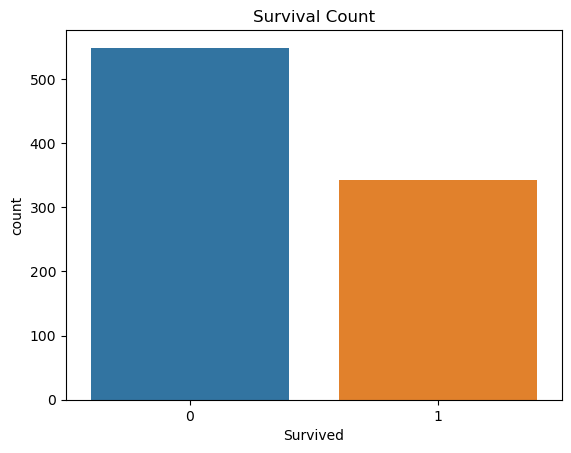

In [20]:
# Visualize the survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

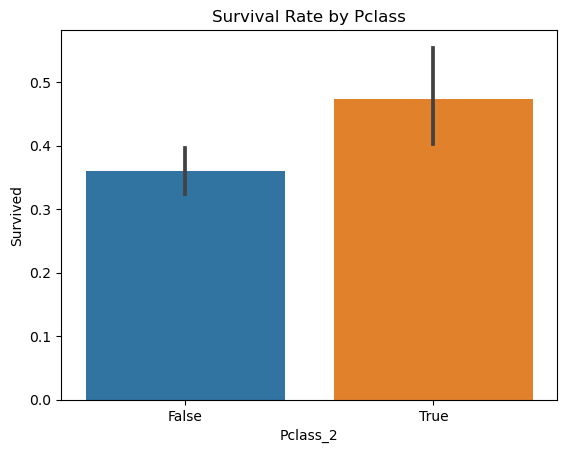

In [21]:
# Explore survival rate based on Pclass
sns.barplot(x='Pclass_2', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

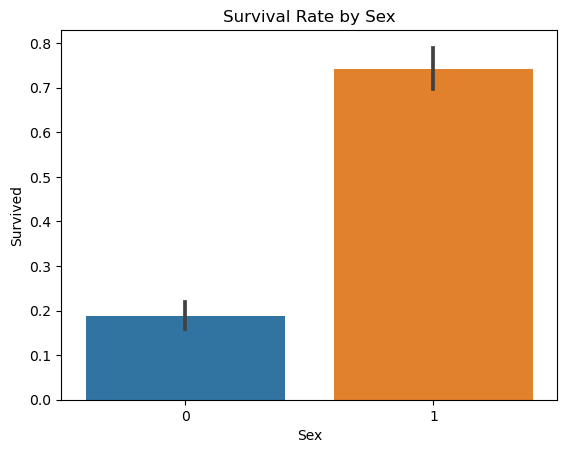

In [22]:
# Explore survival rate based on Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

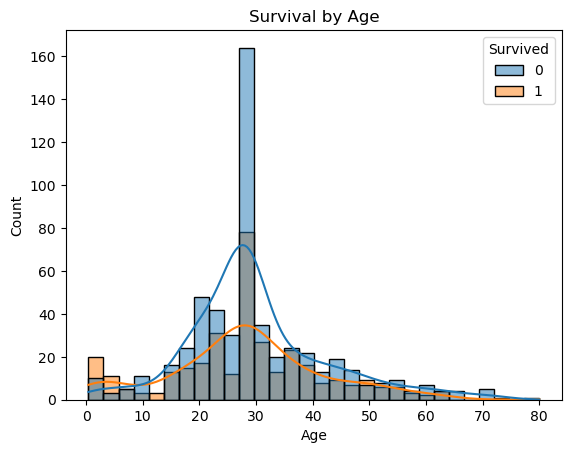

In [23]:
# Explore survival rate based on Age
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.title('Survival by Age')
plt.show()

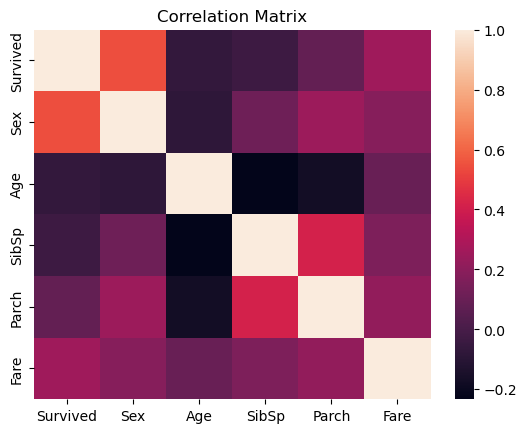

In [43]:
# Explore correlations between numerical variables
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

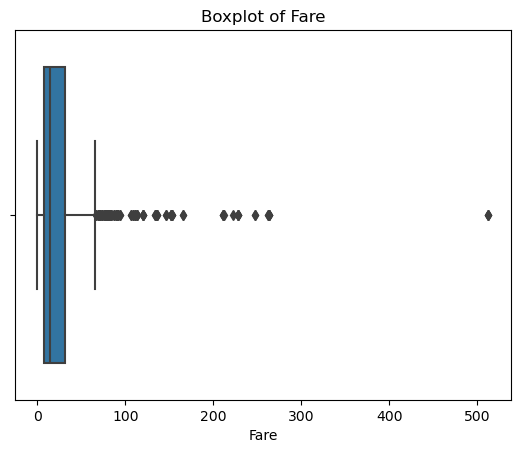

In [49]:
# Handling Outliers in 'Fare'
sns.boxplot(x='Fare', data=df)
plt.title('Boxplot of Fare')
plt.show()

In [50]:
# Apply log transformation to 'Fare' to mitigate the impact of outliers
df['Fare'] = np.log1p(df['Fare'])
print(df)

     Survived  Sex   Age  SibSp  Parch      Fare    Cabin  Embarked_Q  \
0           0    0  22.0      1      0  2.110213  Unknown       False   
1           1    1  38.0      1      0  4.280593      C85       False   
2           1    1  26.0      0      0  2.188856  Unknown       False   
3           1    1  35.0      1      0  3.990834     C123       False   
4           0    0  35.0      0      0  2.202765  Unknown       False   
..        ...  ...   ...    ...    ...       ...      ...         ...   
886         0    0  27.0      0      0  2.639057  Unknown       False   
887         1    1  19.0      0      0  3.433987      B42       False   
888         0    1  28.0      1      2  3.196630  Unknown       False   
889         1    0  26.0      0      0  3.433987     C148       False   
890         0    0  32.0      0      0  2.169054  Unknown        True   

     Embarked_S  Pclass_2  Pclass_3  
0          True     False      True  
1         False     False     False  
2        

In [51]:
# Feature Engineering - Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df)

     Survived  Sex   Age  SibSp  Parch      Fare    Cabin  Embarked_Q  \
0           0    0  22.0      1      0  2.110213  Unknown       False   
1           1    1  38.0      1      0  4.280593      C85       False   
2           1    1  26.0      0      0  2.188856  Unknown       False   
3           1    1  35.0      1      0  3.990834     C123       False   
4           0    0  35.0      0      0  2.202765  Unknown       False   
..        ...  ...   ...    ...    ...       ...      ...         ...   
886         0    0  27.0      0      0  2.639057  Unknown       False   
887         1    1  19.0      0      0  3.433987      B42       False   
888         0    1  28.0      1      2  3.196630  Unknown       False   
889         1    0  26.0      0      0  3.433987     C148       False   
890         0    0  32.0      0      0  2.169054  Unknown        True   

     Embarked_S  Pclass_2  Pclass_3  FamilySize  
0          True     False      True           2  
1         False     Fal

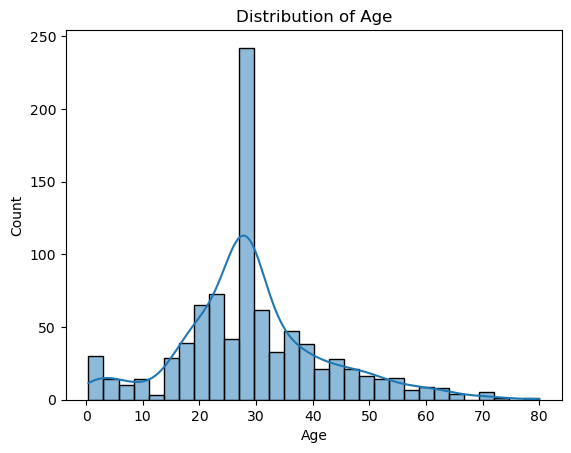

In [52]:
# Age Distribution
sns.histplot(x='Age', data=df, kde=True)
plt.title('Distribution of Age')
plt.show()

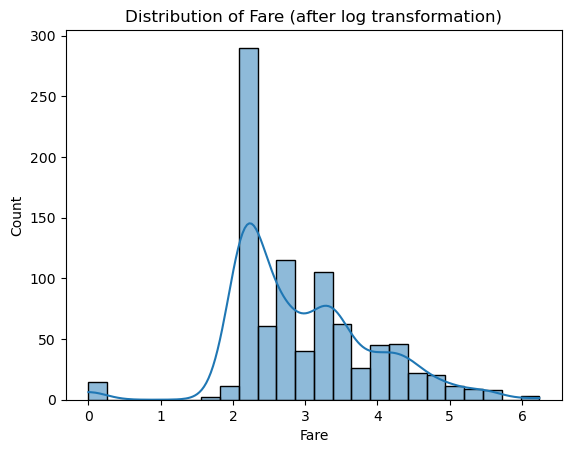

In [53]:
# Fare Distribution after log transformation
sns.histplot(x='Fare', data=df, kde=True)
plt.title('Distribution of Fare (after log transformation)')
plt.show()

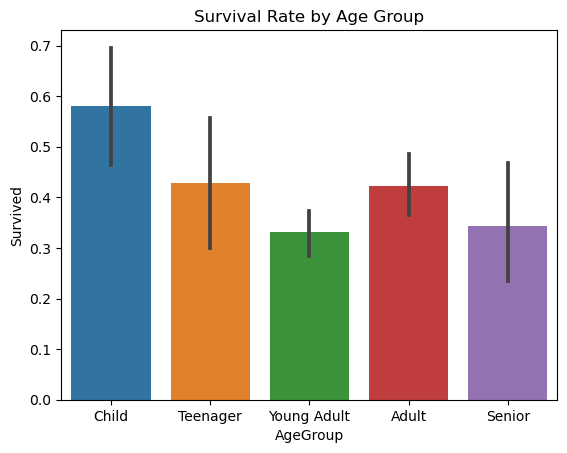

In [54]:
# Survival by Age Group
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
sns.barplot(x='AgeGroup', y='Survived', data=df, order=labels)
plt.title('Survival Rate by Age Group')
plt.show()